In [ ]:
#![My Logo](https://mlpractitioner.com/wp-content/uploads/generic-soc-media-hero-logo-lockup.png)

## 2010-2020-PGA-Points-Analysis

The object is to predict AVG Official World Golf Rating (OWGR) points based on Shots-Gained Stats on the PGA Tour
We will be looking at 2010 throught the 2019 season.

### The current .csv file was scraped using Patrick Young's PGA Scraper

We forked that and created a separate scraping notebook: pga_scrape.ipynb 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1R23zV0EtlxE5eSOj9f-A26cKAN85rI6l)

#### What we are doing:

* Read in the .csv file
* Keep features we will be using
* Create new df1 with kept features
* Drop observations with NaN's in key spots.
* Perform the train_test_split with AVG POINTS (OWGR) as the target
* Try a standard linear regression from SciKitLearn
* Print out the train and test r^2 scores
* Plot with seaborn
* Try a polynomial regression next
* Print out the train and test r^2 scores
* Plot with seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Read CSV File

In [3]:
df = pd.read_csv("2010_2020_PGA_Stats.csv")

In [4]:
df.head()

,Unnamed: 0,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,SG_ATG,SG_OTT,AVG POINTS,POINTS,TOP 10,1ST,Year
0,0,Matt Kuchar,97,69.606,286.9,67.89,69.36,0.648,0.827,1.461,0.336,0.158,4.90,"2,728",11.0,1.0,2010
1,1,Steve Stricker,73,69.660,282.9,68.50,68.29,0.437,1.383,1.818,0.773,0.191,6.39,"2,028",9.0,2.0,2010
2,2,Retief Goosen,75,69.718,291.4,64.79,65.96,0.679,0.917,1.598,0.185,0.337,4.22,"1,360",10.0,NaN,2010
3,3,Paul Casey,64,69.720,294.2,61.31,68.68,0.812,0.587,1.411,0.483,0.215,6.14,"2,250",7.0,NaN,2010
4,4,Jim Furyk,76,69.828,276.0,71.01,67.12,0.402,1.159,1.564,0.641,0.150,6.44,"2,980",7.0,3.0,2010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 17 columns):
Unnamed: 0        1855 non-null int64
NAME              1855 non-null object
ROUNDS            1855 non-null int64
SCORING           1855 non-null float64
DRIVE_DISTANCE    1855 non-null float64
FWY_%             1855 non-null float64
GIR_%             1855 non-null float64
SG_P              1855 non-null float64
SG_TTG            1855 non-null float64
SG_T              1855 non-null float64
SG_ATG            1855 non-null float64
SG_OTT            1855 non-null float64
AVG POINTS        1855 non-null float64
POINTS            1850 non-null object
TOP 10            1540 non-null float64
1ST               346 non-null float64
Year              1855 non-null int64
dtypes: float64(12), int64(3), object(2)
memory usage: 246.4+ KB


### We will be keeping SG's and the Target

In [6]:
# Create list of stats we want to use
# Our target will be 'AVG POINTS'

stats_used = ['SG_P','SG_T','SG_TTG','SG_OTT','SG_ATG','AVG POINTS']

# create a new df1 with the stats_used features
df1 = df[stats_used]

In [7]:
df1.head()

,SG_P,SG_T,SG_TTG,SG_OTT,SG_ATG,AVG POINTS
0,0.648,1.461,0.827,0.158,0.336,4.90
1,0.437,1.818,1.383,0.191,0.773,6.39
2,0.679,1.598,0.917,0.337,0.185,4.22
3,0.812,1.411,0.587,0.215,0.483,6.14
4,0.402,1.564,1.159,0.150,0.641,6.44


### After taking the SG's and target (AVG POINTS) 

Into df1 from df we now can see there are no NaN's left.
Good to go.

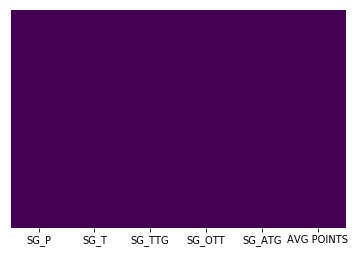

In [10]:
# Take a look at the NaN situation
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### In case you were wondering about the relationships between SG's and AVG POINTS
This Pairplot will attest that there is not a straight linear relationship.

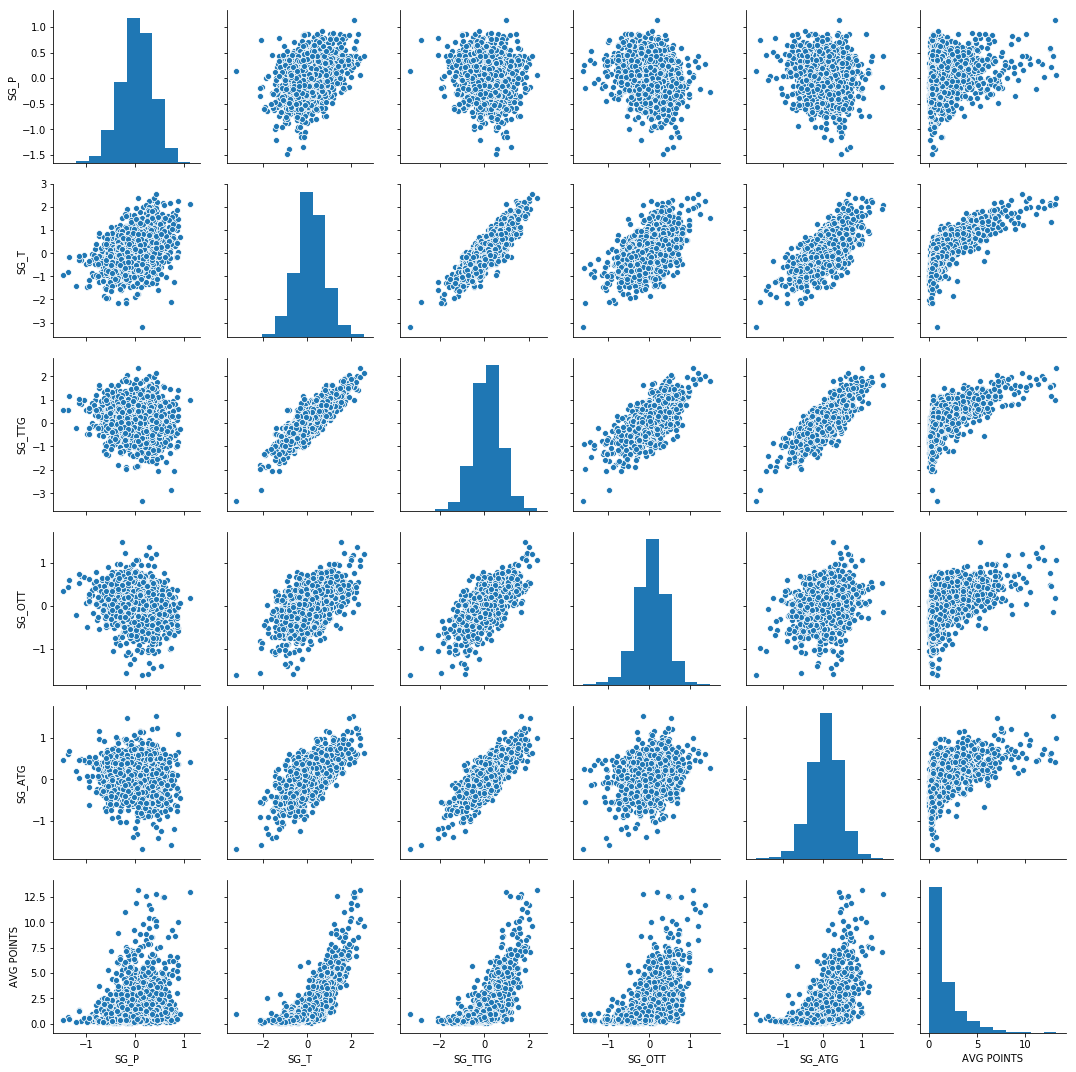

In [20]:
sns.pairplot(data=df1)
plt.show()

## We can use DF1 for our regressions

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split features and target

X = df1.iloc[: ,:-1] # Get the features minus AVG POINTS which is the target
y = df1.iloc[:,-1:]  # Just get the target

# Train test split
# Uses 25% when no test_size is specified
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)


In [22]:
# Instantiate LinearRegression
lr = LinearRegression(normalize=True)
# Do the fit
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [23]:
print('training set r^2 score = ' + str(lr.score(X_train, y_train)))

print('testing set r^2 score = ' + str(lr.score(X_test, y_test)))

training set r^2 score = 0.5378707589435805
testing set r^2 score = 0.5358515463512749


In [24]:
lin_reg_preds = pd.DataFrame(lr.predict(X), columns=['AVG POINTS - Prediction'], index=y.index)

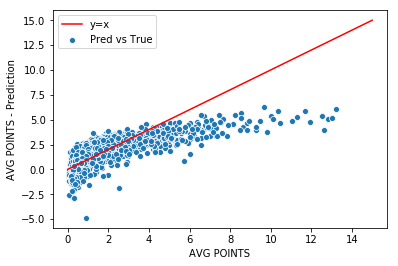

In [25]:
sns.scatterplot(data=pd.concat([y,lin_reg_preds], axis=1), x='AVG POINTS', y='AVG POINTS - Prediction', label='Pred vs True') # scatter plot of prediction vs true
sns.lineplot(np.linspace(0,15,20),np.linspace(0,15,20), color='r', label='y=x') # plot the line y=x
plt.show()

In [ ]:
# Not great but we can improve on it

### Let's try using a Polynomial Regression

In [26]:
# Import polynomial libraries

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features

degree = 2 # Start with 2
poly = PolynomialFeatures(degree, include_bias=False)

X_poly = poly.fit_transform(X) # No longer a pandas dataframe
y_poly = y # Still a pandas dataframe

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly,test_size=0.4, random_state=12)

In [27]:
# Fit the model

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('training set r^2 score = ' + str(lr_poly.score(X_poly_train, y_poly_train)))

print('testing set r^2 score = ' + str(lr_poly.score(X_poly_test, y_poly_test)))

training set r^2 score = 0.7403193487025016
testing set r^2 score = 0.7107304639651364


### Polynomial Regression

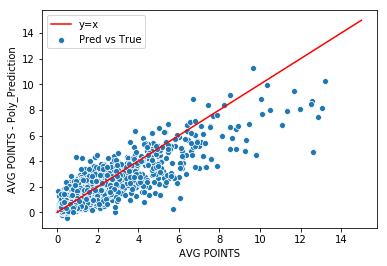

In [29]:
# Create list of predictions
lin_poly_reg_preds = pd.DataFrame(lr_poly.predict(X_poly), columns=['AVG POINTS - Poly_Prediction'], index=y.index) 

# Plot and compare with the line y=x
sns.scatterplot(data=pd.concat([y_poly,lin_poly_reg_preds], axis=1), x='AVG POINTS', y='AVG POINTS - Poly_Prediction', label='Pred vs True') # scatter plot of prediction vs true
sns.lineplot(np.linspace(0,15,20),np.linspace(0,15,20), color='r', label='y=x') # plot the line y=x
plt.show()

## Decent!

### Using a 2nd-degree polynomial regression instead of straight linear 

yields 0.7403193487025016 on the training data

and 0.7107304639651364 on test data

This does assert that the relationship between many of the Shots Gained (SG) stats and AVG POINTS (OWGR) was somewhat non-linear. Using a straight linear regression was not going to do a good job predicting the Official World Golf Rating (AVG). 

### What can we glean from this analysis

The funky WG ranking system requires 2 years of overlapping data to calculate the current rank so we could create a rolling 2yr analysis window to get more accurate predictions.  This is hinted to in djdiroff's kaggle kernel. As a starter project on golf stats which interest me (I am golfer) it kept me reading stats while I tested code so it was definitely worthwhile. Good luck finding datasets for something you are interested in.

The [original investigation](https://www.kaggle.com/djdiroff/on-the-strokes-gained-statistics-on-the-pga-tour) 

by [djdiroff](https://www.kaggle.com/djdiroff) was keenly involved with some clever data restructuring using pivot tables, very good wrangling and hygiene. He made use of Klassen's scraper.

[The original PGA scrape](https://www.kaggle.com/bradklassen/pga-tour-20102018-data/kernels) by
[Brad Klassen](https://www.kaggle.com/bradklassen) was extensive and resulted in a 'historic' dataset with everything. May be good to ask Brad for the code of his scraper.

This exercise was predicated on a tighter scraper that just captured what was needed to do the same analysis.
I forked some code from Patrick Young's Python PGA Scraper (which is not online anymore). I also built a notebook that allows you to set the range of years of PGA data you want to scrape and writes it to a .csv file.

At the end of the day, if it were possible to accurately predict golf rankings, it would be good to keep our conclusions from the actual players and the press. This would create an undending speculative neurosis for that community which I believe they have enough of.